# Donchian Channel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volatility import DonchianChannel

In [43]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations
wband 10 --> 0.16
pband 50 --> -0.20

In [48]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "dc_"
    for w in windows:
        end = str(w)
        dc = DonchianChannel(df.high, df.low, df.close, window=w)
        df[name + "pband_" + end] = dc.donchian_channel_pband()
        df[name + "wband_" + end] = dc.donchian_channel_wband()
        

In [49]:
variations([10, 20, 50, 100, 200])

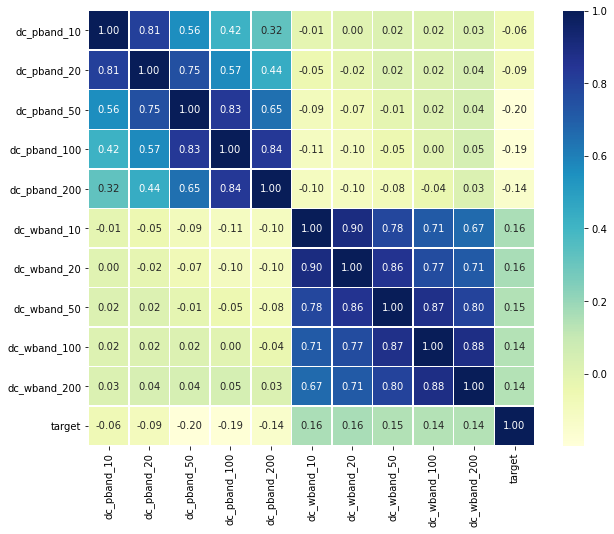

In [50]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

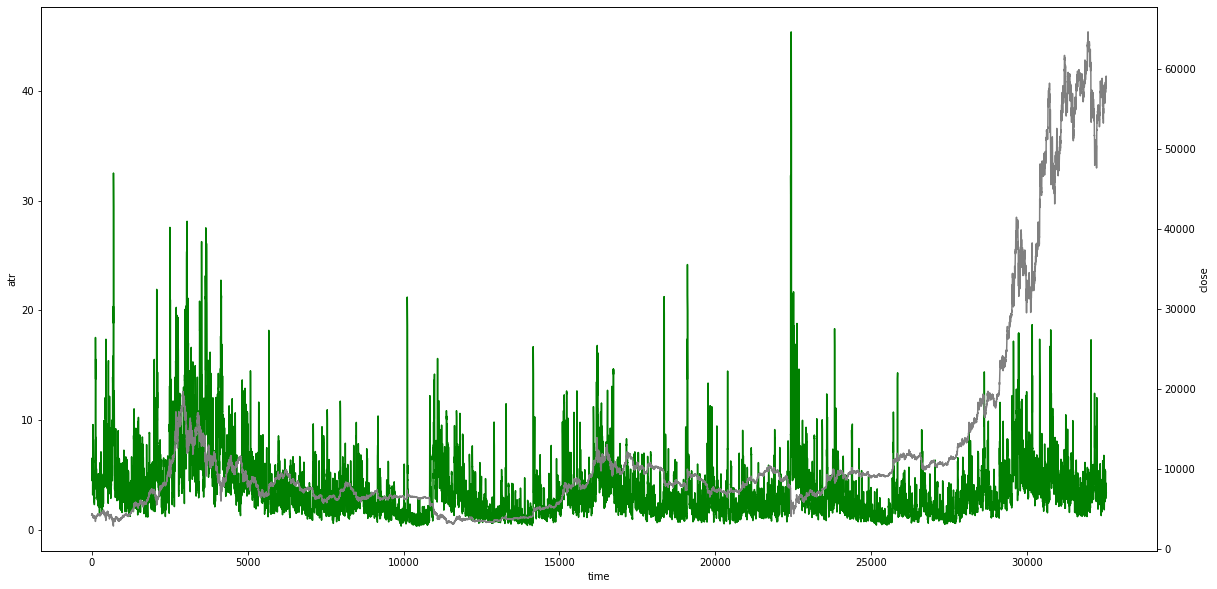

In [53]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.dc_wband_10,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## wband 10 analysis (to beat 0.16)
- No need to do log because within range
- No need to do division because no correlation with price


In [54]:
dplot = df[["dc_wband_10"]].copy()
dplot["dc_wband_10_log"] = list(map(lambda x: np.log(x), dplot.dc_wband_10))
dplot["dc_wband_10_rate"] = uf.get_rate(dplot.dc_wband_10)

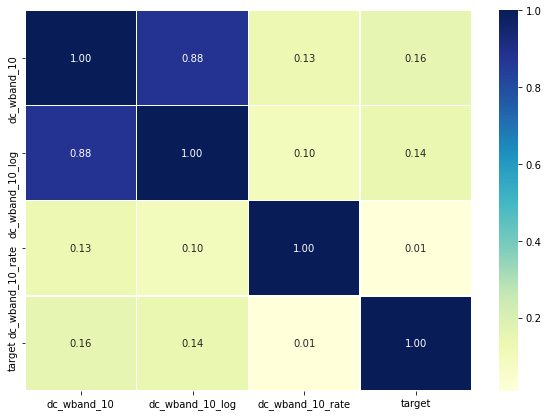

In [55]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## pband 50 analysis (to beat 0.20)¶

In [57]:
dplot = df[["dc_pband_50"]].copy()
dplot["dc_pband_50_rate"] = uf.get_rate(dplot.dc_pband_50)

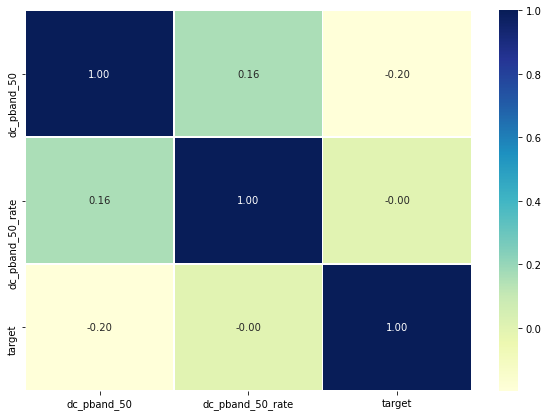

In [58]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Conclusion

In [ ]:
dc = DonchianChannel(df.high, df.low, df.close, window=50)
df[name + "pband_50"] = dc.donchian_channel_pband()
dc = DonchianChannel(df.high, df.low, df.close, window=10)
df[name + "wband_10"] = dc.donchian_channel_wband()